### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform


In [3]:
yellowtaxi = pd.read_csv('data/2019_Yellow_Taxi_Trip_Data.csv')
yellowtaxi.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [4]:
#display row and coloum amount
yellowtaxi.shape

(10000, 18)

#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [5]:
#display statistics of mentioned coloums.
yellowtaxi[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 4

Count the number of NAs in each column.

In [6]:
#displaying number of Not available items in each coloum
yellowtaxi.isnull().sum()

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

array([[<Axes: xlabel='congestion_surcharge', ylabel='congestion_surcharge'>,
        <Axes: xlabel='trip_distance', ylabel='congestion_surcharge'>,
        <Axes: xlabel='fare_amount', ylabel='congestion_surcharge'>,
        <Axes: xlabel='payment_type', ylabel='congestion_surcharge'>,
        <Axes: xlabel='extra', ylabel='congestion_surcharge'>,
        <Axes: xlabel='mta_tax', ylabel='congestion_surcharge'>,
        <Axes: xlabel='tip_amount', ylabel='congestion_surcharge'>,
        <Axes: xlabel='tolls_amount', ylabel='congestion_surcharge'>,
        <Axes: xlabel='improvement_surcharge', ylabel='congestion_surcharge'>,
        <Axes: xlabel='total_amount', ylabel='congestion_surcharge'>,
        <Axes: xlabel='passenger_count', ylabel='congestion_surcharge'>],
       [<Axes: xlabel='congestion_surcharge', ylabel='trip_distance'>,
        <Axes: xlabel='trip_distance', ylabel='trip_distance'>,
        <Axes: xlabel='fare_amount', ylabel='trip_distance'>,
        <Axes: xlabel='pay

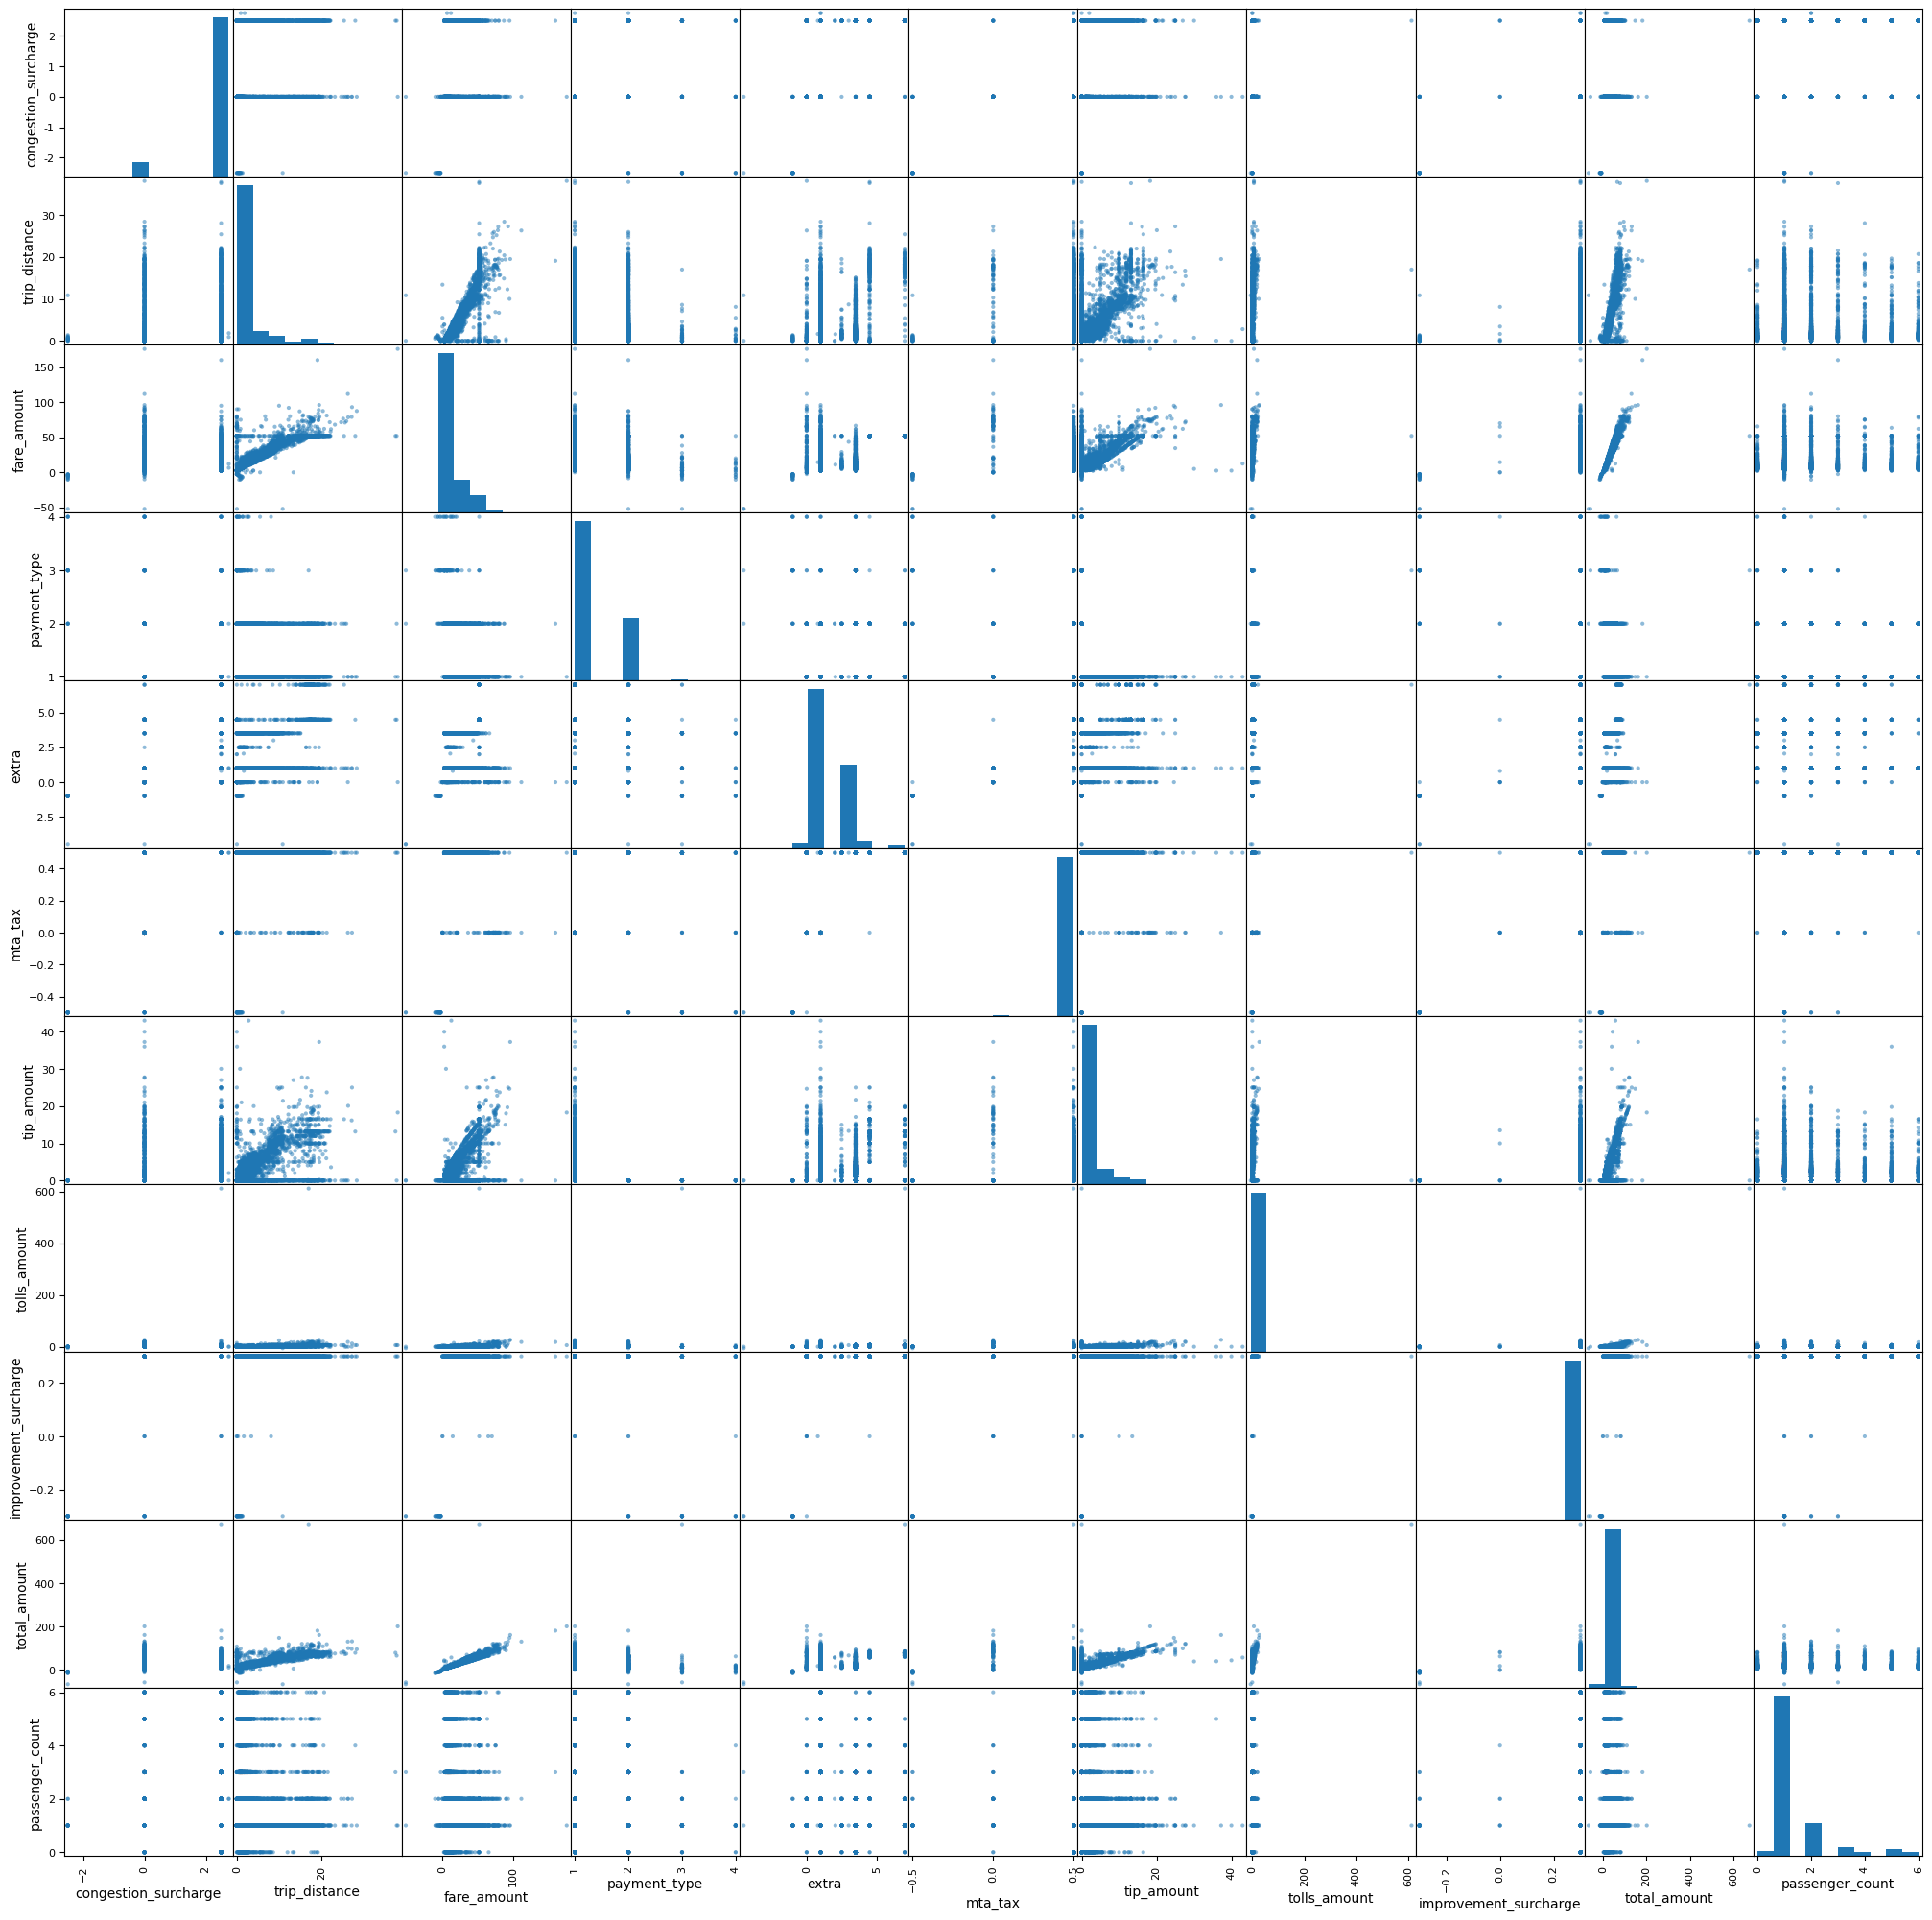

In [7]:
# Read CSV data into Pandas DataFrame, select relevant columns, and create a scatter plot matrix for visualization.
df = pd.read_csv('data/2019_Yellow_Taxi_Trip_Data.csv')
df1 = df[['congestion_surcharge', 'trip_distance', 'store_and_fwd_flag', 'fare_amount', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount','passenger_count' ]]
pd.plotting.scatter_matrix(df1, figsize=(25,25))

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

count    10000.000000
mean        22.564659
std         19.209255
min        -65.920000
25%         12.375000
50%         16.300000
75%         22.880000
max        671.800000
Name: total_amount, dtype: float64


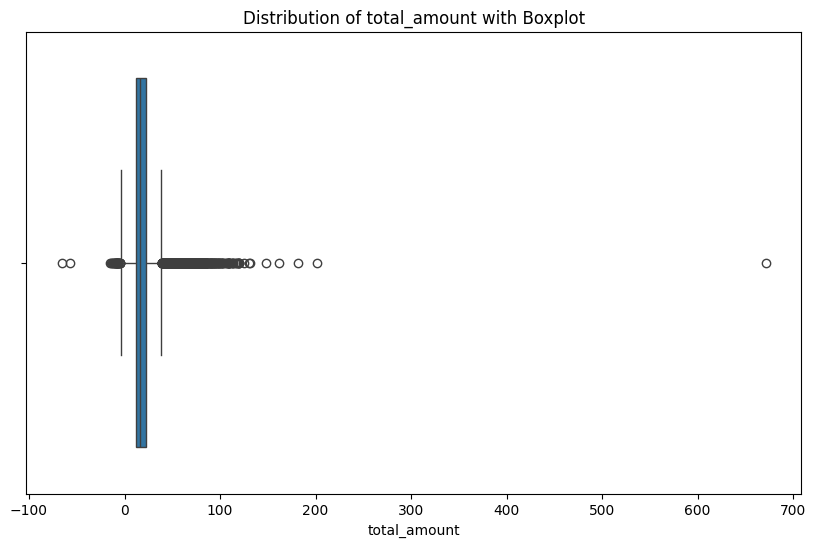

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display summary statistics
print(df['total_amount'].describe())

# Create a box plot to visualize the distribution and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'])
plt.title('Distribution of total_amount with Boxplot')
plt.show()

#### Exercise 7

Use a logistic regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


features = ['passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']
target = 'fare_amount'

X=df[features]
y=df[target]

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

LinearRegressionModel = LinearRegression(fit_intercept=True)

LinearRegressionModel.fit(X_train,y_train)
pred = LinearRegressionModel.predict(X_test)
mse=mean_squared_error(y_test,pred)
mse

31.574958570613823

#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

features = ['passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']
target = 'fare_amount'

X=df[features]
y=df[target]

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

DecisionTreeModel = DecisionTreeRegressor()
DecisionTreeModel.fit(X_train,y_train)
pred=DecisionTreeModel.predict(X_test)
mse=mean_squared_error(y_test,pred)
mse

15.477449131944445